In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from utils import fix_names

In [2]:
def plot_discretized_data(data, x_values, y_values, data_info_, path_to_save=''):

    behavior_ = fix_names([data_info_['behavior']])[0]
    object_name_ = data_info_['object_name']
    tool_ = fix_names([data_info_['tool']])[0]
    trial_ = data_info_['trial']
    modality_ = data_info_['modality']
    
    data = data.reshape(x_values, y_values)
    title = tool_ + '-' + behavior_ + '-' + fix_names([modality_])[0] + ' Features'
    plt.title(title, fontsize=16)
    plt.xlabel('Temporal Bins', fontsize=16)

    if modality_ in ['effort', 'position', 'velocity', 'gripper_joint_states']:
        im = plt.imshow(data.T, cmap='GnBu')
        y_label = 'Joints'
    elif modality_ in ['force', 'torque']:
        im = plt.imshow(data.T, cmap='GnBu')
        y_label = 'Axis'
    elif modality_ in ['audio']:
        im = plt.imshow(np.flipud(data.T), cmap='GnBu')
        y_label = 'Frequency Bins'
    else:
        y_label = ''
    plt.ylabel(y_label, fontsize=16)

    ax = plt.gca()
    ax.set_xticks(np.arange(0, x_values, 1))
    ax.set_xticklabels(np.arange(1, x_values + 1, 1))
    if modality_ in ['force', 'torque']:
        axis = ['x', 'y', 'z']
        ax.set_yticks(np.arange(0, len(axis), 1))
        ax.set_yticklabels(axis)
    else:
        ax.set_yticks(np.arange(0, y_values, 1))
        ax.set_yticklabels(np.arange(1, y_values + 1, 1))

    # Colorbar with same height as the plot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.1)
    plt.colorbar(im, cax=cax)

    if path_to_save:
        file_path = path_to_save + os.sep + filename_ + '.png'
        plt.savefig(file_path, bbox_inches='tight', dpi=100)

    plt.show()
    plt.close()

In [3]:
binary_dataset_path = r'data' + os.sep
data_file_path = os.sep.join([r'data', 'dataset_metadata.bin'])
bin_file = open(data_file_path, 'rb')
metadata = pickle.load(bin_file)
bin_file.close()

behaviors = list(metadata.keys())
objects = metadata[behaviors[0]]['objects']
tools = metadata[behaviors[0]]['tools']
trials = metadata[behaviors[0]]['trials']

print('behaviors: ', len(behaviors), behaviors)
print('objects: ', len(objects), objects)
print('tools: ', len(tools), tools)
print('trials: ', len(trials), trials)

robots_data_filepath = r'data' + os.sep + 'dataset_discretized.bin'
bin_file = open(robots_data_filepath, 'rb')
robot = pickle.load(bin_file)
bin_file.close()

behaviors:  6 ['1-look', '2-stirring-slow', '3-stirring-fast', '4-stirring-twist', '5-whisk', '6-poke']
objects:  15 {'metal-nut-bolt', 'detergent', 'empty', 'cane-sugar', 'split-green-pea', 'salt', 'wooden-button', 'chia-seed', 'plastic-bead', 'glass-bead', 'styrofoam-bead', 'water', 'kidney-bean', 'wheat', 'chickpea'}
tools:  6 {'plastic-spoon', 'plastic-knife', 'metal-scissor', 'wooden-fork', 'wooden-chopstick', 'metal-whisk'}
trials:  10 {'trial-6', 'trial-3', 'trial-8', 'trial-1', 'trial-2', 'trial-0', 'trial-5', 'trial-7', 'trial-4', 'trial-9'}


In [4]:
# 1-look, 2-stirring-slow, 3-stirring-fast, 4-stirring-twist, 5-whisk, 6-poke
behavior = '3-stirring-fast'

# wooden-fork, plastic-knife, plastic-spoon, metal-whisk, metal-scissor, wooden-chopstick
tool = 'metal-scissor'

# water, kidney-bean, wooden-button, glass-bead, cane-sugar, split-green-pea, styrofoam-bead, chia-seed, empty, salt, wheat,
# plastic-bead, chickpea, metal-nut-bolt, detergent
object_name = 'metal-nut-bolt'

trial_num = 0
x_values = 10 # temporal bins

example:  (100,)


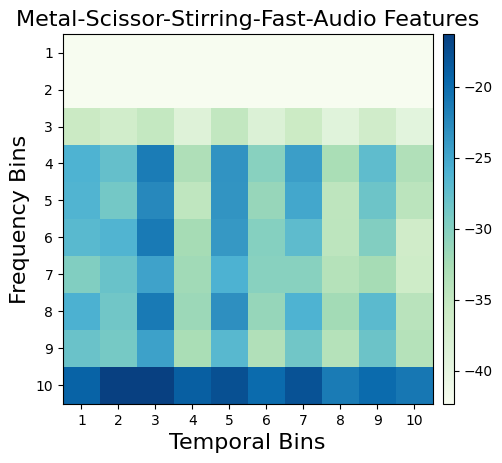

example:  (60,)


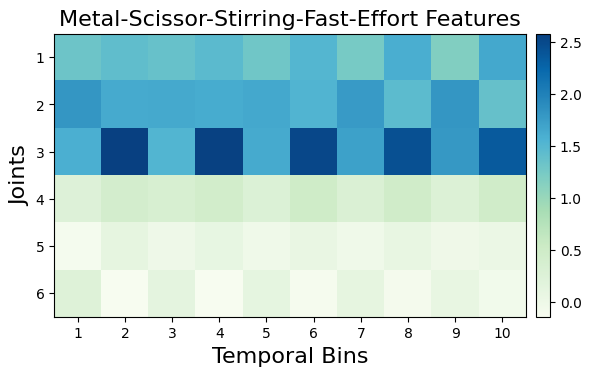

example:  (30,)


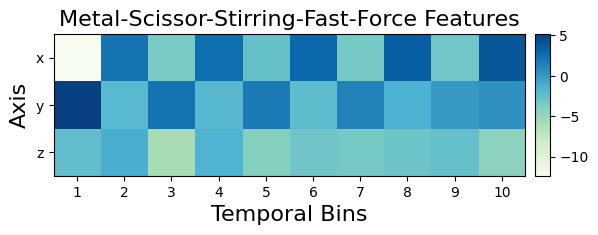

In [5]:
# audio, effort, force
modality = 'audio'
example = robot[behavior][tool][modality][object_name]['X'][trial_num]
num_of_features = example.shape[-1]
print('example: ', example.shape)
y_values = num_of_features//x_values
data_info = {'behavior': behavior, 'modality': modality, 'trial': trial_num, 'object_name': object_name, 'tool': tool}
plot_discretized_data(example, x_values, y_values, data_info, path_to_save=False)

modality = 'effort'
example = robot[behavior][tool][modality][object_name]['X'][trial_num]
num_of_features = example.shape[-1]
print('example: ', example.shape)
y_values = num_of_features//x_values
data_info = {'behavior': behavior, 'modality': modality, 'trial': trial_num, 'object_name': object_name, 'tool': tool}
plot_discretized_data(example, x_values, y_values, data_info, path_to_save=False)

modality = 'force'
example = robot[behavior][tool][modality][object_name]['X'][trial_num]
num_of_features = example.shape[-1]
print('example: ', example.shape)
y_values = num_of_features//x_values
data_info = {'behavior': behavior, 'modality': modality, 'trial': trial_num, 'object_name': object_name, 'tool': tool}
plot_discretized_data(example, x_values, y_values, data_info, path_to_save=False)